## Data : Wine 
* 다양성, 위치, 와이너리, 가격 및 설명이 포함된 150,000개의 와인 리뷰
* Data From : https://www.kaggle.com/datasets/zynicide/wine-reviews

### 1. 데이터 불러오기

* 기본 패키지 불러오기

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('mode.chained_assignment',  None)

* CSV 파일 불러오기 

In [2]:
wn = pd.read_csv('winemag-data_first150k.csv')

* 데이터 살펴보기

In [3]:
wn.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<컬럼 설명>
* Unnamed: 0 : 고유번호
*  country : 생산 나라
* description : 설명
* designation : 소몰리에의 한줄평
* points : 점수
* price : 가격
* province : 생산 지역 혹은 주
* region_1 : 와인재배 지역
* region_2 : 와인재배의 구체적인 지역
* variety : 품종
* winery : 와인 양조장

### 2. 데이터 전처리

*  Unnamed: 0 컬럼 이름 바꾸기

In [4]:
wn = wn.rename(columns={'Unnamed: 0' : 'number'})

* 컬럼별 결측치 확인

In [5]:
wn.isnull().sum()

number             0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

* 가격컬럼의 결측치를 대체값으로 넣기 힘들어 결측치를 제거한다.

In [6]:
wn = wn.dropna(axis ='index', how = 'all', subset = 'price')

* 와인 생산 개수가 10개 미만인 것은 평균데이터를 잡기 어려워 제거한다.

In [7]:
wn_1 = wn['variety'].value_counts().reset_index(name = 'counts')
wn_2 = wn_1[wn_1['counts'] > 10]['index'].tolist()
wn = wn[wn['variety'].isin(wn_2)]
wn

,number,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


* 나라별 생산량이 30개 미만인 와인도 제거한다

In [8]:
wn_3 = wn.groupby(['country'])['variety'].value_counts().reset_index(name = 'counts')
wn_4 = wn_3[wn_3['counts'] > 30]['variety'].tolist()
wn  = wn[wn['variety'].isin(wn_4)]


* 와인의 가격대비 점수를 계산하여 와인의 추천도값을 컬럼을 추가한다.

In [9]:
wn['recommand'] = wn['points']/wn['price']

### 3. 질문하기 

* 나라별 와인 평균 점수, 가격 품종생산량, 추천도은 어떻게 되는가?
* 품종별 가격, 점수는 어떠한가?
* 와이너리별 점수,가격은 어떠한가?
* 나라별 생산량 Top5품종의 주요 특징
* 어떠한 요인이 가격을 결정하는데 영향을 많이 미쳤는가?
* 점수가 높은 와인을 생산하는 와이너리의 지리적 특징

### 4. EDA

#### 4-1 나라별 와인 평균 점수, 가격, 추천도는 어떻게 되는가?

In [10]:
wn_con = wn.groupby(['country'])['points','price','recommand'].mean()

C:\Users\User\AppData\Local\Temp\ipykernel_15732\623673425.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wn_con = wn.groupby(['country'])['points','price','recommand'].mean()


C:\Users\User\AppData\Local\Temp\ipykernel_15732\3119596296.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\User\AppData\Local\Temp\ipykernel_15732\3119596296.py:16: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)


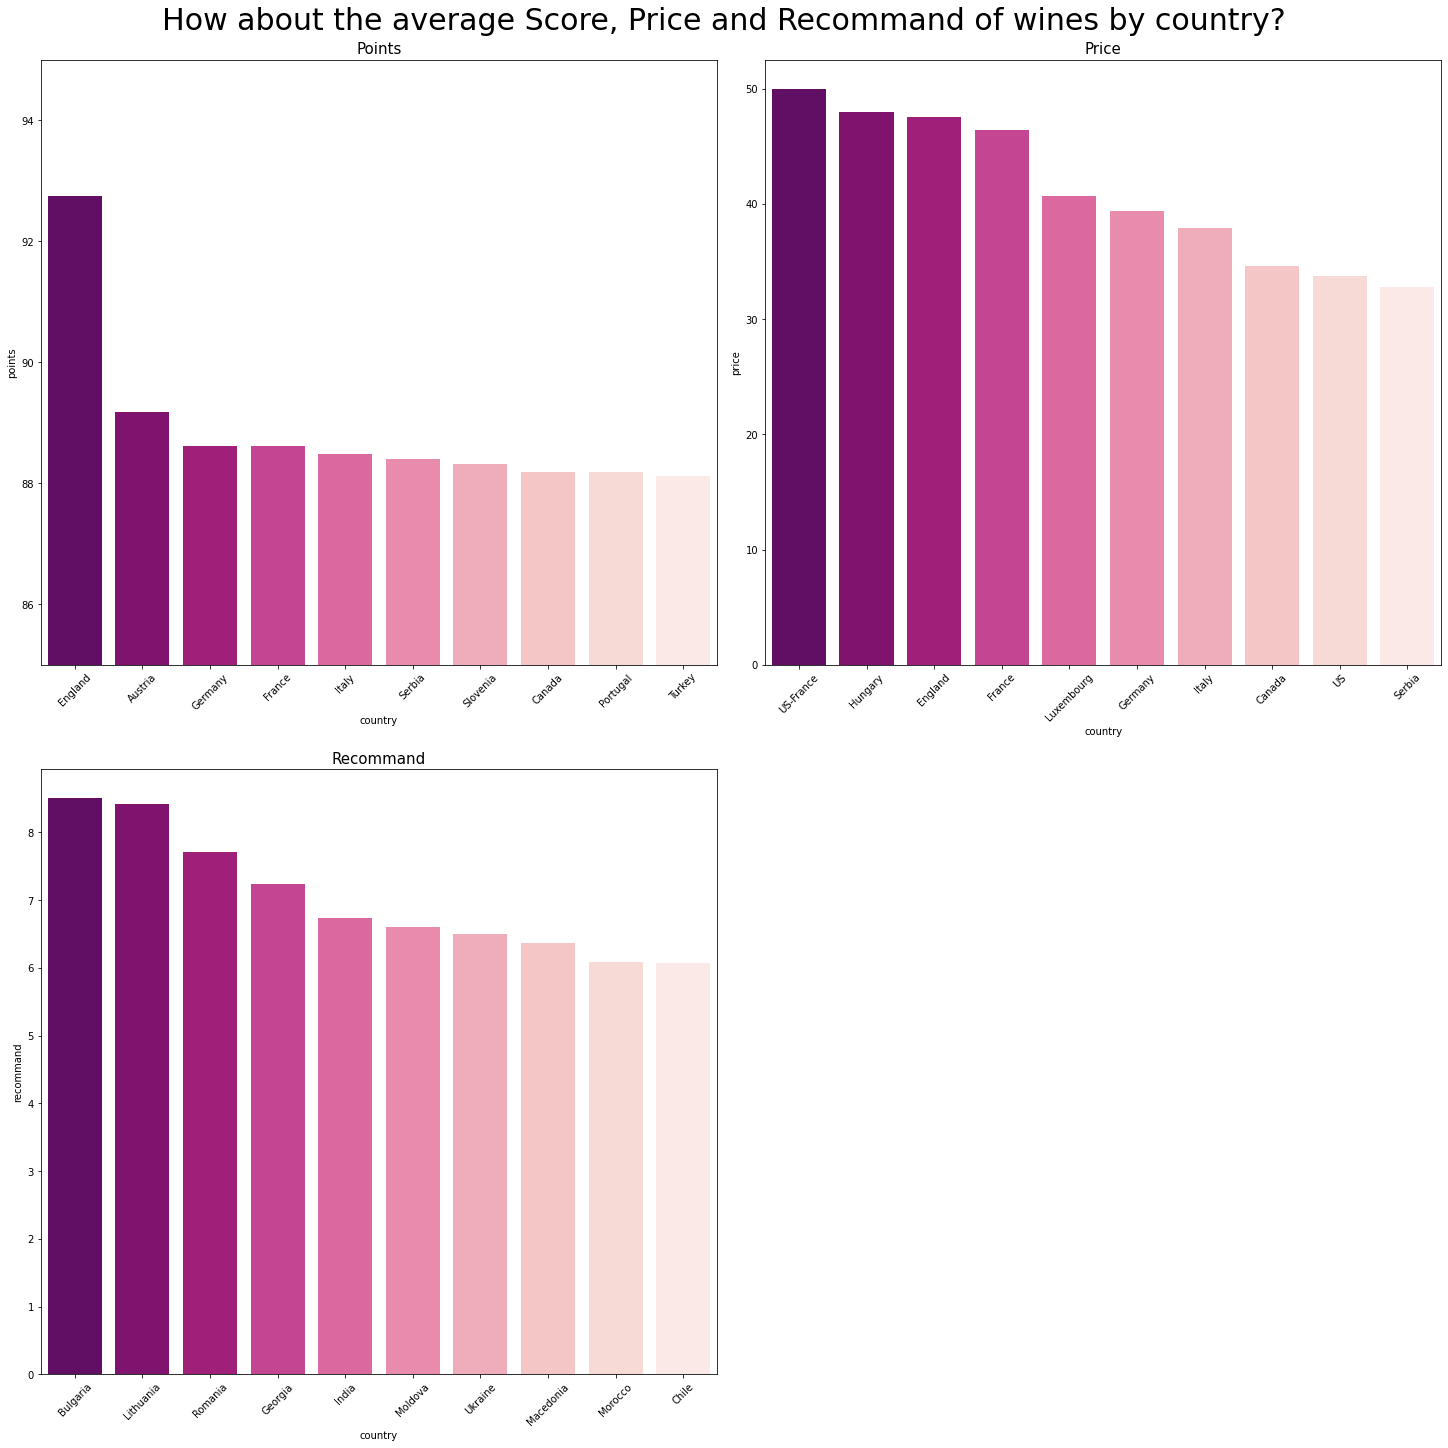

In [11]:
f,ax = plt.subplots(2,1,figsize = (20,20),constrained_layout=True)

f.suptitle('How about the average Score, Price and Recommand of wines by country?', fontsize = 30)

plt.subplot(2,2,1)
sns.barplot(data = wn_con.reset_index().sort_values(by = 'points',ascending= False).head(10),x = 'country', y = 'points',palette= 'RdPu_r')
plt.ylim([85,95])
plt.title("Points",fontsize = 15)
plt.xticks(rotation = 45);

plt.subplot(2,2,2)
sns.barplot(data = wn_con.reset_index().sort_values(by = 'price',ascending= False).head(10),x = 'country', y = 'price',palette= 'RdPu_r')
plt.title("Price",fontsize = 15)
plt.xticks(rotation = 45);

plt.subplot(2,2,3)
sns.barplot(data = wn_con.reset_index().sort_values(by = 'recommand',ascending= False).head(10),x = 'country', y = 'recommand',palette= 'RdPu_r')
plt.title("Recommand",fontsize = 15)
plt.xticks(rotation = 45);

와인의 가격과 점수가 높은 나라는 주로 서유럽에서 생산된 와인으로 비싸고 좋은 와인을 마시고 싶으면  
그 지역와인을 선택하면 되지만 점수대비 가격이 적절한 와인을 먹고싶다면 추천도가 좋은 불가리아, 리투아니아 등
동유럽와인을 추천한다.

#### 4-2 품종별 가격, 점수, 추천도는 어떠한가?

In [12]:
wn_va = wn.groupby(['variety'])['price','points','recommand'].mean().reset_index()


C:\Users\User\AppData\Local\Temp\ipykernel_15732\3758187540.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wn_va = wn.groupby(['variety'])['price','points','recommand'].mean().reset_index()


C:\Users\User\AppData\Local\Temp\ipykernel_15732\2543397817.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)
C:\Users\User\AppData\Local\Temp\ipykernel_15732\2543397817.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,3)


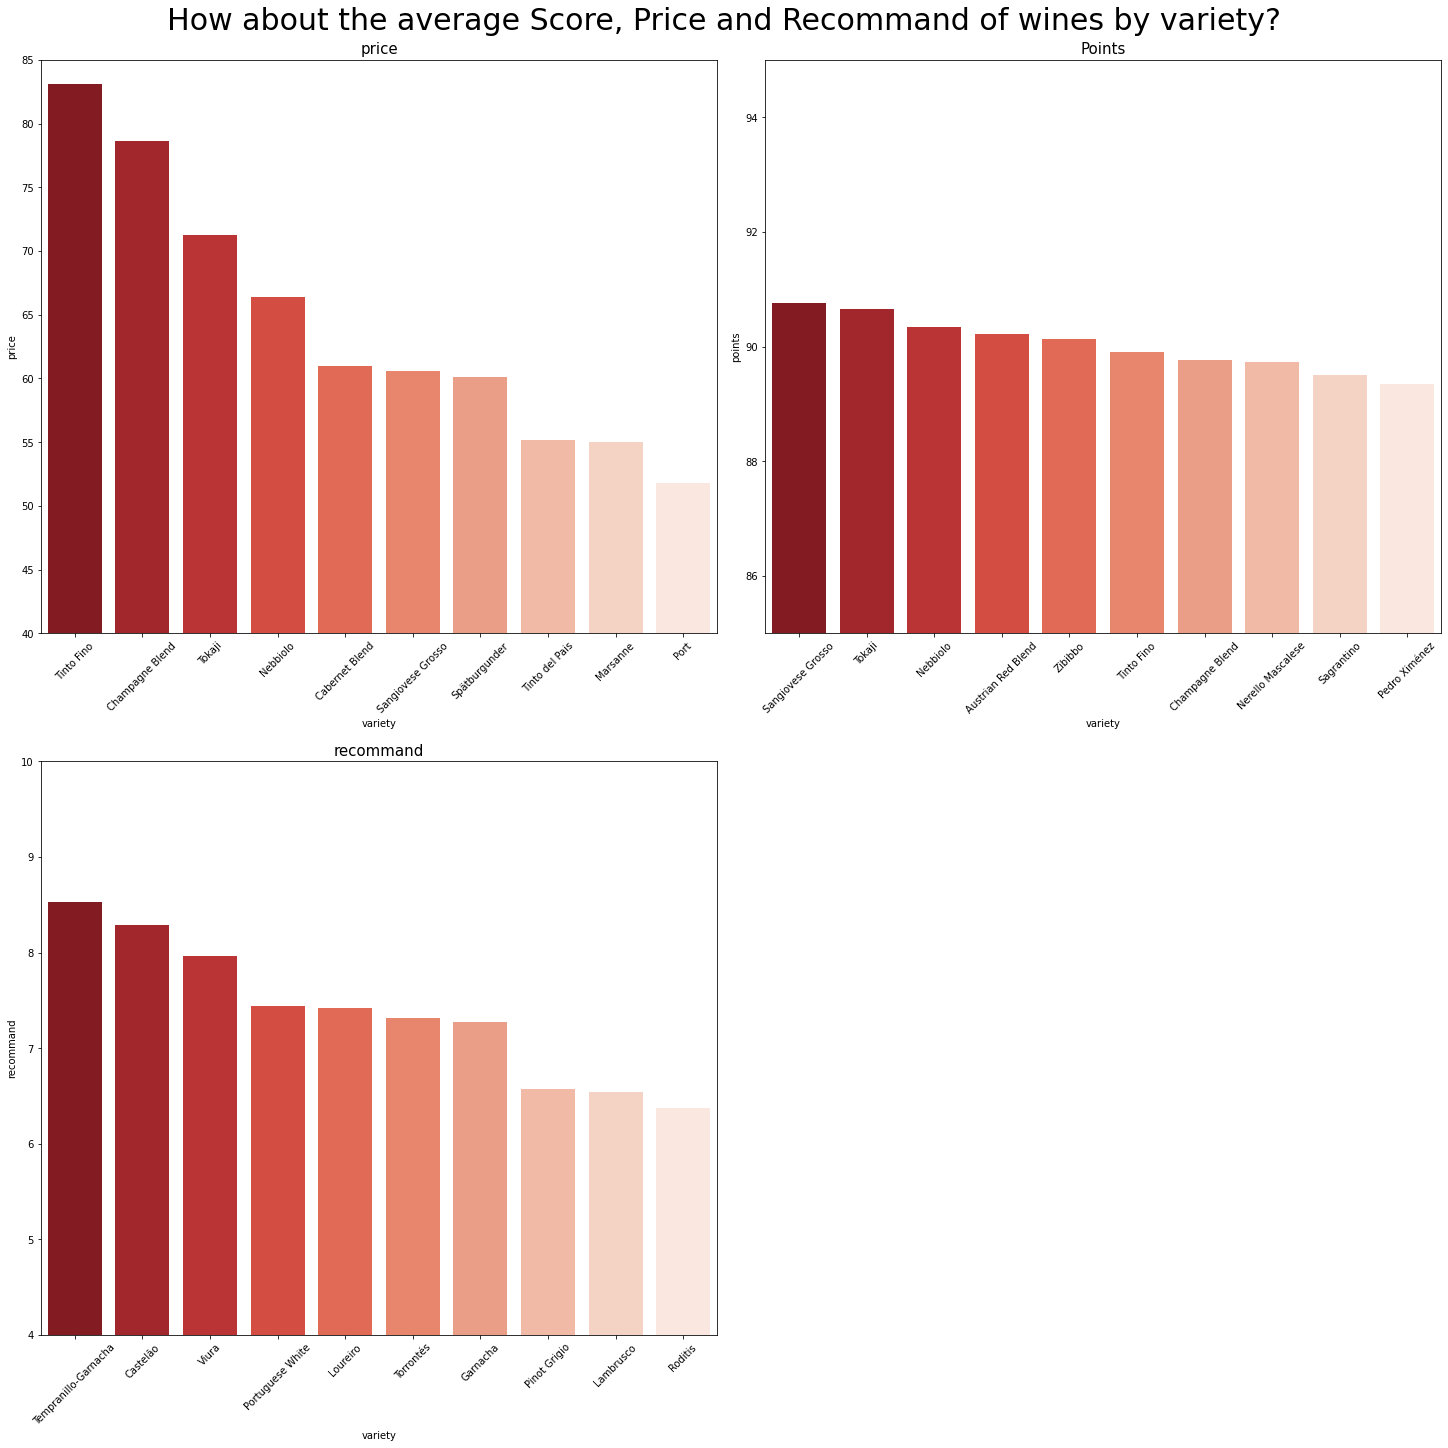

In [13]:
f,ax = plt.subplots(2,1,figsize=(20,20),constrained_layout=True)

f.suptitle('How about the average Score, Price and Recommand of wines by variety?', fontsize = 30)

plt.subplot(2,2,1)
sns.barplot(data  = wn_va.sort_values(by = 'price',ascending= False).head(10),x = 'variety', y = 'price',palette= 'Reds_r')
plt.ylim([40,85])
plt.title("price",fontsize = 15)
plt.xticks(rotation = 45);

plt.subplot(2,2,2)
sns.barplot(data  = wn_va.sort_values(by = 'points',ascending= False).head(10),x = 'variety', y = 'points',palette= 'Reds_r')
plt.ylim([85,95])
plt.title("Points",fontsize = 15)
plt.xticks(rotation = 45);

plt.subplot(2,2,3)
sns.barplot(data  = wn_va.sort_values(by = 'recommand',ascending= False).head(10),x = 'variety', y = 'recommand',palette= 'Reds_r')
plt.ylim([4,10])
plt.title("recommand",fontsize = 15)
plt.xticks(rotation = 45);

 가격높은 와인의 품종은 그래프에서 확인한 결과 Tinto Fino,Champagne Blend,Tokaji,Nebbiolo,Cabernet Blend 순으로 와인품종이 비싸고,  
 점수는 Sangiovese Grosso, Tokaji, Nebbiolo,Austrian Red Blend, Zibibbo순으로 높은 점수를 보여준다.  
 만약 내가 점수는 높지만 가격을 타협하고 싶을 때 추천도 가 높은 Tempranillo-Garnacha, Castelão, Viura 품종의 와인을 선택하면 좋은 선택지가
될것이다.

#### 4-3 나라별 생산량이 Top5 품종의 특징은?

In [14]:
wn['country'].value_counts().head(5)

US        61261
Italy     18039
France    14338
Spain      7650
Chile      5635
Name: country, dtype: int64

생산량이 Top5인 나라는 미국, 이탈리아, 프랑스, 스페인, 칠레이다.

먼저 필요없는 단어를 선별한다

In [15]:
# 필요없는 단어
useless = ['a','and','the','of','with','in','is','this','to','it','for','its','that','but','or','from','Its','The','on','by','has']

그럼 각 나라에서 생산된 와인의 설명에서 많이 나오는 단어를 나열해 보자

미국 와인

In [16]:
# 미국에서 제작된 와인을 먼저 추출한다.
wn_us = wn[wn['country'] == 'US']
# description컬럼을 단어마다 자르고, 특수문자를 제거한다.
wn_us = pd.Series(str(list(wn_us['description'])).replace(',', '').replace("'", '').replace('.', '').split()).value_counts().reset_index().rename(columns={'index':'US_word',0:'US_counts'})
# 단어에서 필요없는 단어를 제외시킨다
wn_us = wn_us[~wn_us['US_word'].isin(useless)].reset_index(drop=True).head(30)

이탈리아 와인

In [17]:
wn_it = wn[wn['country'] == 'Italy']
wn_it = pd.Series(str(list(wn_it['description'])).replace(',', '').replace("'", '').replace('.', '').split()).value_counts().reset_index().rename(columns={'index':'Italy_word',0:'Italy_counts'})
wn_it = wn_it[~wn_it['Italy_word'].isin(useless)].reset_index(drop=True).head(30)

프랑스 와인

In [18]:
wn_fr = wn[wn['country'] == 'France']
wn_fr = pd.Series(str(list(wn_fr['description'])).replace(',', '').replace("'", '').replace('.', '').split()).value_counts().reset_index().rename(columns={'index':'France_word',0:'France_counts'})
wn_fr = wn_fr[~wn_fr['France_word'].isin(useless)].reset_index(drop=True).head(30)

스페인 와인

In [19]:
wn_sp = wn[wn['country'] == 'Spain']
wn_sp = pd.Series(str(list(wn_sp['description'])).replace(',', '').replace("'", '').replace('.', '').split()).value_counts().reset_index().rename(columns={'index':'Spain_word',0:'Spain_counts'})
wn_sp = wn_sp[~wn_sp['Spain_word'].isin(useless)].reset_index(drop=True).head(30)

칠레 와인

In [20]:
wn_ch = wn[wn['country'] == 'Chile']
wn_ch = pd.Series(str(list(wn_ch['description'])).replace(',', '').replace("'", '').replace('.', '').split()).value_counts().reset_index().rename(columns={'index':'Chile_word',0:'Chile_counts'})
wn_ch = wn_ch[~wn_ch['Chile_word'].isin(useless)].reset_index(drop=True).head(30)

모든 나라를 합쳐서 보자

In [21]:
wn_con_des = pd.concat([wn_us,wn_it,wn_fr,wn_sp,wn_ch],axis = 1)
wn_con_des

,US_word,US_counts,Italy_word,Italy_counts,France_word,France_counts,Spain_word,Spain_counts,Chile_word,Chile_counts
0,flavors,37485,wine,10842,wine,12760,flavors,5479,flavors,4201
1,wine,29874,fruit,8404,fruit,5800,aromas,4398,aromas,3180
2,fruit,19482,aromas,8345,acidity,5631,palate,3992,palate,2887
3,cherry,14606,cherry,6018,flavors,5414,finish,3712,finish,2684
4,dry,12996,spice,5235,It,4413,wine,2374,fruit,2024
5,tannins,12903,This,4728,ripe,3924,are,2300,berry,1879
6,oak,11792,palate,4239,tannins,3793,fruit,2256,nose,1665
7,acidity,11466,offers,3792,fruits,3521,berry,2206,wine,1664
8,are,10628,black,3753,This,3134,nose,2163,herbal,1500
9,finish,10372,tannins,3652,A,2933,plum,2044,are,1413


미국의 와인은 달콤한 맛과 타닌으로 떫은 맛이 강하고 와인을 만들때 블랙배리를   
다른 나라의 와인보다 많이 넣는 다는 특징이 있다. 또한 와인에서 오크향 진하다.  

이탈리아 와인은 와인을 만들때 향신료와 채리의 종류을 넣어 맛과 풍미가 강하다.  
또한 다른 나라보다 화이트와인을 더 많이 생산하다.  

프랑스 와인은 잘 익은 포도를 수확하여 와인을 생산한다. 또한 여러 종류의 과일을 넣는다는것은  
프랑스 와인 만의 특징이다. 또한 레드 와인을 많이 생산하고 신맛이 강하게 난다.  

스페인 와인도 프랑스 와인과 마찬가지로 다양한 과일을 넣어서 와인을 생산하는데 그 중 자두, 와인,  
산딸기를 넣어 와인을 생산한다. 또한 와인의 아로마의 풍미가 풍부하다.  

칠레와인은 스페인 와인과 같이 아로마의 풍미가 진하고, 스페인와인은 다른 나라와 다르게 허브를   
비교적 많이 넣어 주고 향이 다양하고 강하다는 특징이 있다.

#### 4-4 어떠한 요인이 가격을 결정하는데 영향을 많이 미쳤는가?

평균 가격이 높은 Top3를 선별한다.

In [22]:
wn.groupby(['variety'])['price'].mean().sort_values(ascending = False).head(3).reset_index(name = 'mean')

,variety,mean
0,Tinto Fino,83.120000
1,Champagne Blend,78.627119
2,Tokaji,71.222222


Tinto Fino종의 특징 분석

In [23]:
wn_tf = wn[wn['variety'] == 'Tinto Fino']
wn_tf = pd.Series(str(list(wn_tf['description'])).replace(",","").replace("[","").split()).value_counts().reset_index().rename(columns={'index':'word',0:'counts'})
wn_tf = wn_tf[~wn_tf['word'].isin(useless)]['word'].tolist()


Champagne Blend의 특징 분석 및 Tinto Fino종과의 공통적인 특징 선별

In [24]:
wn_cb = wn[wn['variety'] == 'Champagne Blend']
wn_cb = pd.Series(str(list(wn_cb['description'])).replace(",","").replace("[","").split()).value_counts().reset_index().rename(columns={'index':'word',0:'counts'})
wn_cb[~wn_cb['word'].isin(useless)]

wn_po = wn_cb[wn_cb['word'].isin(wn_tf)].head(30)['word'].tolist()

Tokaji종의 특징 분석 및 와인들의 공통적인 특징 선별

In [25]:
wn_to = wn[wn['variety'] == 'Tokaji']
wn_to = pd.Series(str(list(wn_to['description'])).replace(",","").replace("[","").split()).value_counts().reset_index().rename(columns={'index':'word',0:'counts'})
wn_to[~wn_to['word'].isin(useless)]

wn_to[wn_to['word'].isin(wn_po)].head(5)['word'].tolist()


['wine', 'citrus', 'flavors', 'acidity', 'fruit']

와인제조시 기본재료와 함께 citrus(귤)을 같이 넣거나, 와인의 맛이 신맛이 높으면   
평균가격이 높아질것을 기대할수 있다.

#### 4-5 점수가 높은 와이너리의 지리적 특징

In [26]:
wn_wi = wn.groupby(['region_2'])['points'].mean().sort_values(ascending = False).reset_index(name = 'points').head(3)
wn_wi

,region_2,points
0,Columbia Valley,88.942819
1,Napa,88.910651
2,Willamette Valley,88.895913


Columbia Valley, Nepa, 	Willamette Valley 순으로 재배되서 만들어진 와인이 평균 점수가 높다.

Columbia Valley : Columbia Valley의 지리적 특징은 전체 지역적으로 추운 겨울과 낮은 습도와 긴 건조 성장 시즌의 공통 기후 특성을 공유한다.
이 지역의 따뜻한 낮과 시원한 밤은 포도의 산도와 당도의 균형을 유지하는 데 도움이 되어 와인에 풍미의 
 독특한 균형을 부여한다. 포도나무는 캘리포니아보다 약간 더 오래 매달려있습니다. 이렇게 하면 
포도가 성숙할 수 있는 시간이 늘어나 와인에서 나오는 아로마의 특징을 살릴수 있다.    

Nepa Valley : Nepa Valley는 활발한 지각판 운동과 화산 활동으로 지금의 지형이 만들어졌다. 그리고 이로
인해 33가지의 매우 다양한 토양이 조성되어있다.
산맥의 영향과 태평양과의 근접성으로 Nepa Valley의 기후는 포도 재배를 위한 완벽한 지중해성 기후를 가진다.
포도의 재배 기간에 화창하고 따뜻하며 건조한 날이 이어져 포도가 천천히 고르게 익을 수 있으며.
질병 및 곰팡이 위험을 줄인다. 또한 저녁에는 서늘하여 큰 일교차로 인해 포도의 산도 유지에 도움을 준다.    

Columbia Valley : 최근 수십 년 동안 Columbia Valley는 미국 포도 재배 지역이 여러 개 있는 주용 와인 생산지가 되었습니다.
캘리포니아 보다 더 시원한 기후를 가진 Columbia Valley는 완만하고 구불구불한 언덕이 있어 세계에서 가장 좋은 
Pinot noir와 Pinot gris을 생산한다. 그러나 Columbia Valley의 모든 지역이 포도밭에 적합한 것은 아니다.